# Lab 1: Exploratory Data Analysis (EDA)

This lab exercise demonstrates EDA of an example dataset with the Python modules `Pandas`, `Numpy`, `Matplotib` and `Seaborn`.

> "At a high level, EDA is the practice of using visual and quantitative methods to understand and summarize a dataset without making any assumptions about its contents. It is a crucial step to take before diving into machine learning or statistical modeling because it provides the context needed to develop an appropriate model for the problem at hand and to correctly interpret its results."
> <a href="https://www.svds.com/value-exploratory-data-analysis/">Chloe Mawer</a> 

## A. Importing Modules and Dataset

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing the modules, the next step is to load the dataset into a Pandas dataframe.
Dataframe is the term used in Pandas for two-dimensional arrays.

In this tutorial, we use the example dataset loans_train.csv available as a CSV file.
The file loans_train.csv is expected to be in the same directory as this notebook.

In [31]:
df = pd.read_csv('./bank.csv')

# You can also open loans_train.csv with Excel and take a look at it.

## B. Quick Data Exploration

Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [32]:
# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [33]:
# Print last 5 rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

### Formulate a particular question that might be interesting to answer by exploring this dataset

are there any features or combinations of features which seems to strongly correlate with whether a person will subscribe to the product, and if so can the most promising features be used for predictive purposes using ML.?

### Calculate statistics for the numerical and categorical attributes. Draw a short conclusion

In [45]:
print(df.keys())

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [34]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [42]:
df.describe().transpose()

count         mean          std    min     25%    50%     75%  \
age       1988.0    41.753018    12.724358   18.0   32.00   38.0    50.0   
balance   2000.0  1413.663500  3131.224213 -980.0  201.50  551.0  1644.5   
day       2000.0    13.851500     9.712189    1.0    5.00   12.0    23.0   
duration  2000.0   292.020500   221.557295    7.0  146.00  236.0   379.0   
campaign  2000.0     1.909500     1.378862    1.0    1.00    1.0     2.0   
pdays     2000.0   167.896000   131.754126   -1.0   75.75  182.0   251.0   
previous  2000.0     2.561500     3.400735    0.0    1.00    2.0     3.0   

              max  
age          93.0  
balance   81204.0  
day          31.0  
duration   1823.0  
campaign     11.0  
pdays       854.0  
previous     55.0

We can also examine the correlation matrix of all numerical attributes in the form of a **heat map**.

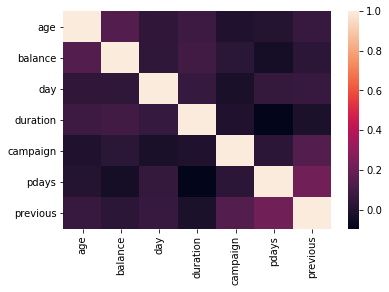

In [36]:
#correlation matrix
sns.heatmap(df.corr());

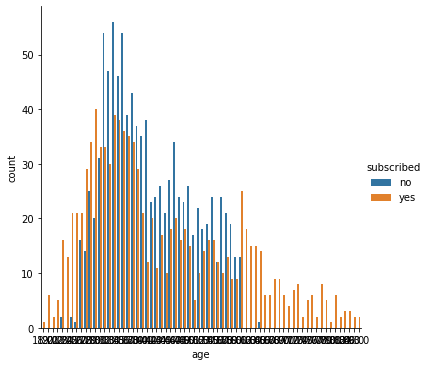

In [48]:
 sns.catplot(x='age', hue='subscribed', data=df, kind='count')

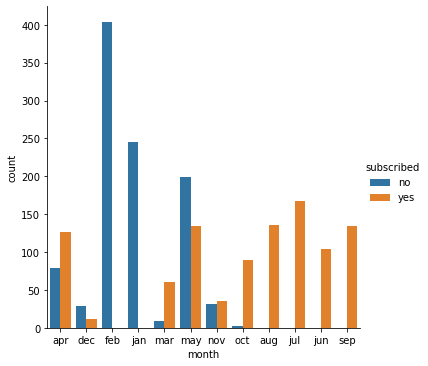

In [49]:
 sns.catplot(x='month', hue='subscribed', data=df, kind='count')

the heatmap shows the strongest correlations are between pdays & previous, duration & balance, campaign & previous, balance & age. 

looking at the numerical attributes we see that the participants range in age from 18 to 93 and at least half are married and most have college degrees.
looking at the two catplots we can see that when it comes to age v subscribers there tends be an even distribution of yes v no for early to middled aged, people but a much greater subscribtion rate for those later in life.
months v subscribers clearly shows certains months are a lot more likely to result in more subscribers than others, with the least likely months to have someone subscribe being january and february.


### Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions 

In [52]:
features = ['age','duration','campaign','previous','pdays']

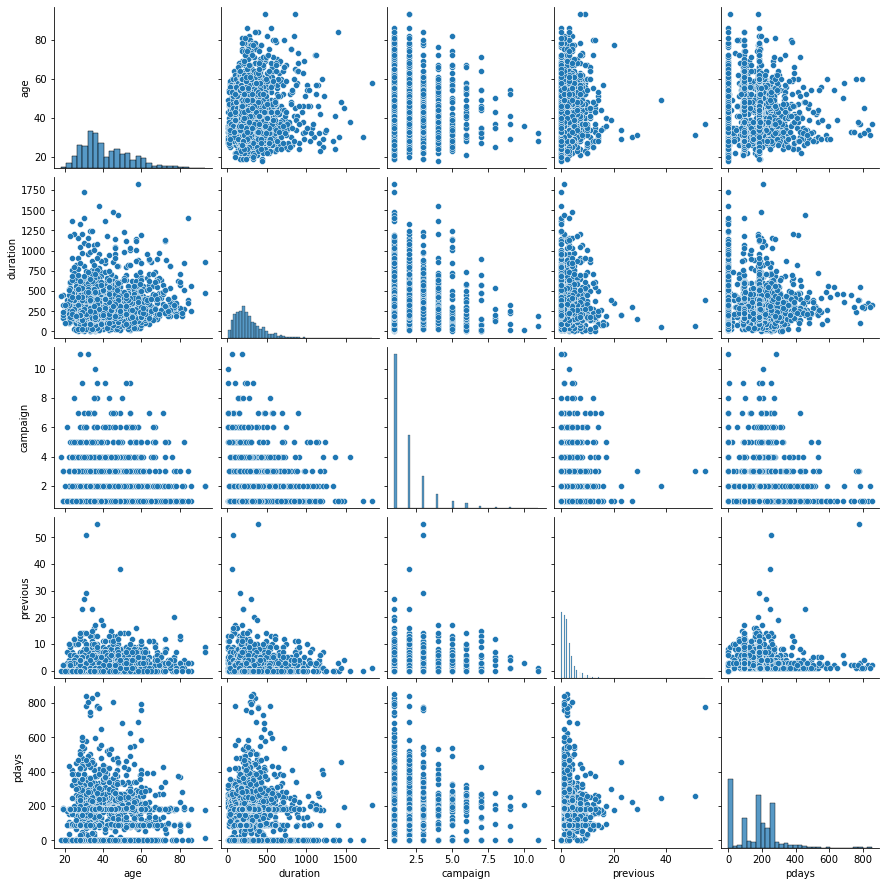

In [53]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[features].dropna())
plt.show()

### Generate two plots with the combined distribution of attributes and draw conclusions from them

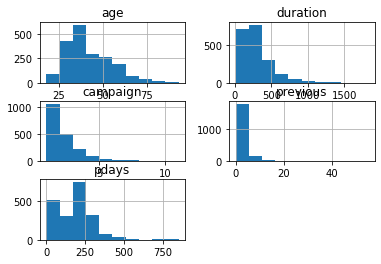

In [65]:

df[features].hist()
plt.show()

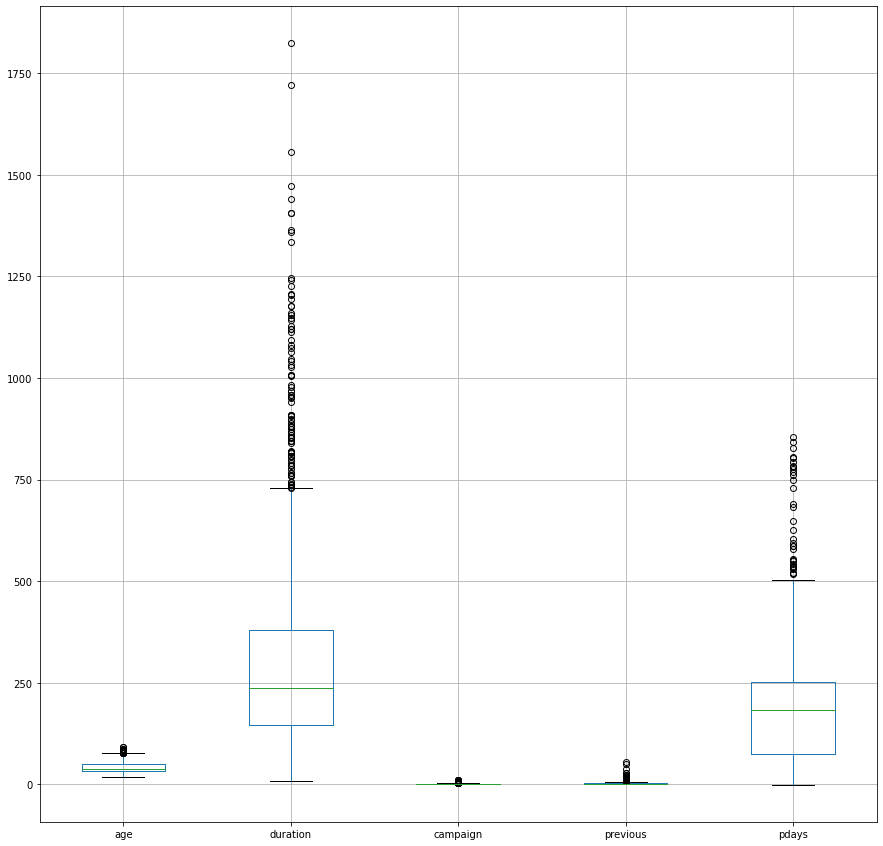

In [70]:
fig=plt.figure(figsize=(15,15), facecolor='white')
df.boxplot(features)
plt.show()

The box plot above confirms the presence of a lot of outliers/extreme values. This may be attributed to the income disparity in the society. Part of this can be due to the fact that we are looking at people with different education levels. Let us segregate them by `Education`.

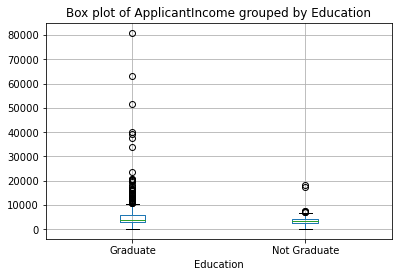

In [12]:
# Boxp lots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='ApplicantIncome', by='Education')
plt.title('Box plot of ApplicantIncome grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

We can see that there is no substantial difference between the mean income of graduates and non-graduates. But there are a higher number of graduates with very high incomes.

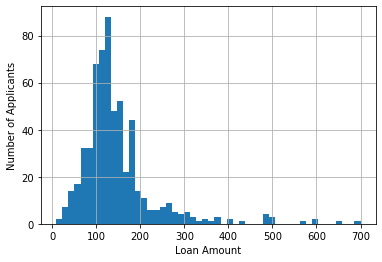

In [13]:
# Next, we examine a histogram of the numerical attribute loanAmount

df['LoanAmount'].hist(bins=50)
plt.xlabel("Loan Amount")
plt.ylabel('Number of Applicants')
plt.show()

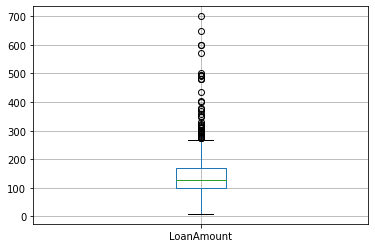

In [14]:
# Boxp lot of LoanAmount
df.boxplot(column='LoanAmount')
plt.show()

Again, there are some extreme values. Clearly, both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing values as well as many extreme values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. We will take this up in the next lab exercise.

Finally, let's examine the relationship between `ApplicantIncome` and `LoanAmount` with a scatter plot.

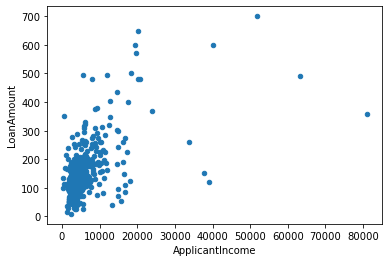

In [15]:
df.plot.scatter(x='ApplicantIncome', y='LoanAmount')
plt.show()

Based on this scatter plot we can say that LoanAmount probably tends to grow linearly as ApplicantIncome grows. We can see the trend clearer with `Seaborn's regplot`, which draws a line that best fits the relation between two numeric attributes.

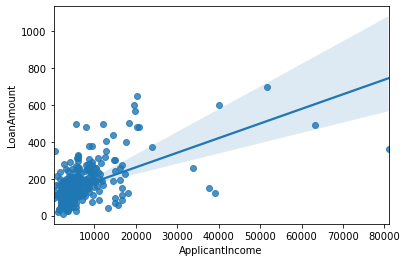

In [16]:
sns.regplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.show()

This regplot suggests that typically LoanAmount is 100 times lower than ApplicantIncome.

## D. Box Plot Variations

Next, we will use the `Seaborn` module to demonstrate a few variations or alternatives to box plots.

C:\Users\Ray\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


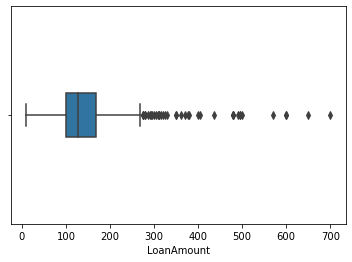

In [17]:
#First, let's draw a seaborn-style box plot for LoanAmount

sns.boxplot(x=df['LoanAmount'], orient='v', width=0.2)
plt.show()

C:\Users\Ray\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


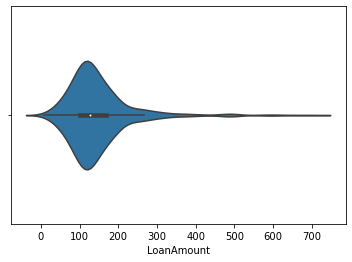

In [18]:
#Violin plot for LoanAmount

sns.violinplot(x=df['LoanAmount'], orient='v', width=0.5)
plt.show()

C:\Users\Ray\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


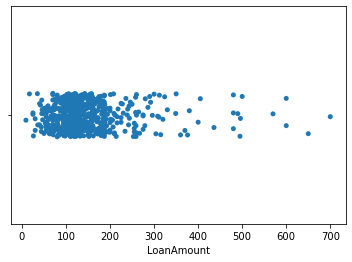

In [19]:
#Strip plot for LoanAmount

sns.stripplot(x=df['LoanAmount'], jitter=True, orient='v')
plt.show()

C:\Users\Ray\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Ray\anaconda3\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Ray\anaconda3\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\Ray\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


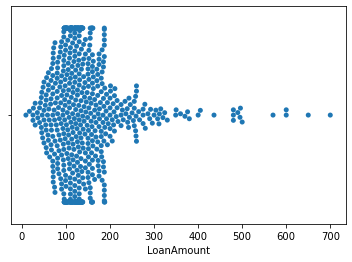

In [20]:
#Swar mplot for LoanAmount

sns.swarmplot(x=df['LoanAmount'], orient='v')
plt.show()

Let's redraw the box plots of `ApplicantIncome` grouped by the categorical attribute `Education` as violin plots.

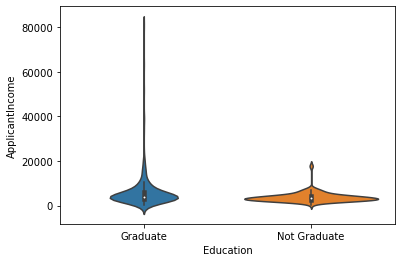

In [21]:
sns.violinplot(data=df, x='Education', y='ApplicantIncome')
plt.show()

We can split each violin plot by a binary attribute. For example, we can add `Gender` to the plot above as follows.

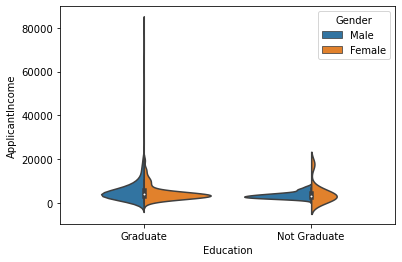

In [22]:
sns.violinplot(data=df, x='Education', y='ApplicantIncome', hue='Gender', split=True)
plt.show()

The plot above suggest that male graduates in our dataset have more even distribution of income than female graduates, while the opposite is true for applicants who are not graduates.

## E. Distribution Analysis for Categorical Attributes

As noted above `Credit_History` is rather a categorical attribute with two categories/values:
- 0 - the applicant has no credic history
- 1 - the applicant has a credit history

Let's look at the chances of getting a loan based on credit history. That is, let's examine the relation between atributes `Credit_History` and `Loan_Status`.

First, let's take a look at the frequency table for attribute `Credit_History`:

In [23]:
frequency_table = df['Credit_History'].value_counts(ascending=True)
print('Frequency Table for Credit History:') 
print(frequency_table)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


Next, build a pivot table for `Loan_Status` and `Credit_History`, i.e. find the mean `Loan_Status` for both `Credit_History`=0 and `Credit_History`=1.

In [24]:
pivot_table_LC = df.pivot_table(values='Loan_Status',
                                index='Credit_History',
                                aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean()) 

Here the values of `Loan_Status` are grouped by the index `Credit_History`, and the aggfunc is applied to each group. In the example above aggfunc is `mean()`, assuming the Y and N values in column `Loan_Status` are replaced by 1s and 0s, respectively.

In [25]:
# Print pivot table
print(pivot_table_LC)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


The pivot table can be interprted as follows. The probability for getting a loan is 0.078652 (i.e. ~8%) for applicants with no credit history, and 0.795789 (i.e. ~80%) for applicants with a credit history.

Let's plot `Credit_History` and the probability of getting a loan based on `Credit_History`.

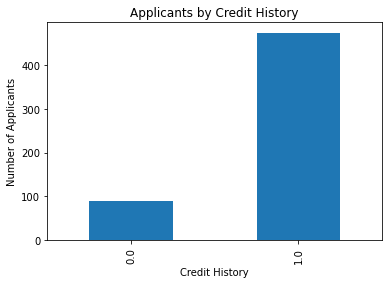

In [26]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Credit History')
plt.show()

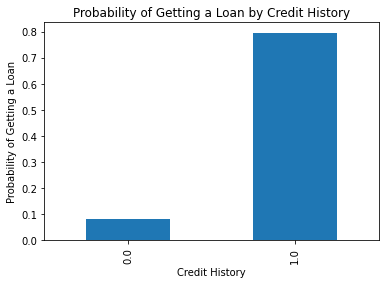

In [27]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Probability of Getting a Loan')
plt.title('Probability of Getting a Loan by Credit History')
plt.legend().set_visible(False) # we don't need the default legend

Alternately, the two plots above can be combined in a stacked chart by plotting the output of with Pandas' `crosstab()` function:

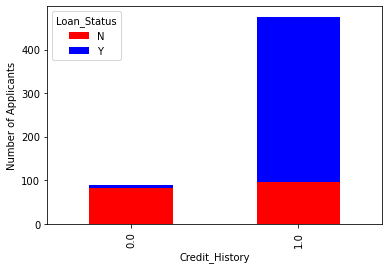

In [28]:
crosstab_CL = pd.crosstab(df['Credit_History'], df['Loan_Status'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

Furthermore, we can stackchart `Credit_History` and `Gender` against `Loan_Status`.

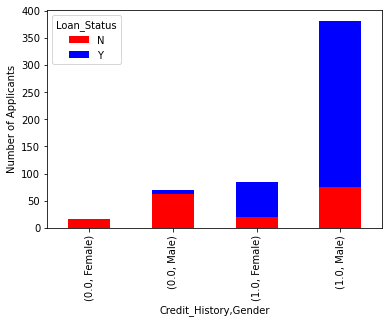

In [29]:
crosstab_CGL = pd.crosstab([df['Credit_History'], df['Gender']], df['Loan_Status'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

The plot above suggests that gender does not play a significant role when taking a decision for granting a loan. However, it is hard to say which gender is more likely to have a loan granted when `Credit_History`=1, for example. To see this clearer, we can build a pivot table with the mean values of `Loan_Status` for each combination of values of `Credit_History` and `Gender` and then visualise this pivot table as a heat map.

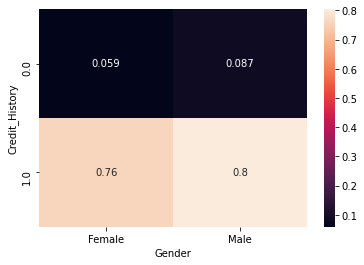

In [30]:
pivot_table_LCG = df.pivot_table(values='Loan_Status', 
                           index='Credit_History', 
                           columns='Gender',
                           aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

We can see now that a male with credit history is slightly more likely to have their loan granted than a female with credit history 1. However, we should not rush to make strong conclusions from this observation yet, because we have not examined how the numerical attributes (e.g., `LoanAmmount` and `ApplicantIncome`) relate to `Gender` and `Loan_Status`.